<a href="https://colab.research.google.com/github/asadnhasan/NLP-using-Tensorflow/blob/main/Predicting_Text_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [2]:
from google.colab import files
uploaded_file = files.upload()

Saving Syed Asad Contract 230123.pdf to Syed Asad Contract 230123.pdf


In [3]:
!pip install PyMuPDF

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 26.7 MB/s eta 0:00:00


In [10]:
corpus = []  # Initialize an empty list to store page texts


In [12]:
import fitz  # PyMuPDF

pdf_file_path = list(uploaded_file.keys())[0]
pdf_document = fitz.open(pdf_file_path)

# Loop through pages and extract text
for page_num in range(pdf_document.page_count):
    page = pdf_document.load_page(page_num)
    text = page.get_text("text")
    print(f"Page {page_num + 1}:\n{text}\n")

pdf_document.close()

Page 1:
Form SMT/6 
 1 | ©Peninsula Business Services Limited 
STATEMENT OF MAIN TERMS OF 
EMPLOYMENT 
This Statement, together with the Employee Handbook, forms part of your Contract of 
Employment (except where the contrary is expressly stated) and sets out particulars of the main 
terms on which Trusted Interactions Group Limited T/A Cymphony, The Dovecote, Crewe Hall 
Farm Buildings, Old Park Road, Crewe, CW1 5UE 
 
Employs: Syed Asad 
 
Your employment began on 23rd January 2023. No previous employment counts as part of your period of 
continuous employment. 
 
JOB TITLE    
You are employed as Homeworking Contact Centre Agent and your duties will be as advised by the 
Directors and the Office Manager.  Your duties may be modified from time to time to suit the needs of 
the business.  
 
PROBATIONARY PERIOD 
Your employment is subject to a probationary period of 3 months. During this period your work 
performance and general suitability will be assessed and, if it is satisfactory,

In [16]:
# Creating an instance of Tokenizer class
tokenizer = Tokenizer()

In [13]:
corpus.append(text)  # Append each page's text to the corpus list

In [14]:
# Combine all texts into a single string and convert to lowercase
combined_text = "\n".join(corpus).lower()

In [15]:
# Split the combined lowercase text into lines
lowercase_corpus = combined_text.split("\n")

In [17]:
# This line fits the tokenizer on the text corpus. The tokenizer "learns" the vocabulary from the text by assigning a unique numerical index to each word in the corpus.
# The fit_on_texts() method processes the text data and updates the tokenizer's internal vocabulary based on the words it encounters.
tokenizer.fit_on_texts(corpus)

In [18]:
# This line calculates the total number of unique words in the vocabulary by adding 1 to the length of the tokenizer's word index.
# The +1 is added because word indices start from 1 and not 0.
total_words = len(tokenizer.word_index) + 1

In [20]:
total_words

189

In [21]:
print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'company': 3, 'property': 4, 'of': 5, 'equipment': 6, 'you': 7, 'to': 8, 'your': 9, 'any': 10, 'or': 11, 'in': 12, 'shall': 13, 'as': 14, 'for': 15, 'are': 16, 'on': 17, 'be': 18, 'which': 19, 'it': 20, 'policy': 21, 'that': 22, 'is': 23, 'a': 24, 'employment': 25, 'confidential': 26, 'information': 27, 'service': 28, 'maintain': 29, 'at': 30, 'responsible': 31, 'damage': 32, 'insurance': 33, 'should': 34, 'ensure': 35, 'with': 36, 'employee': 37, 'not': 38, "company's": 39, 'reasonable': 40, 'home': 41, 'during': 42, 'b': 43, 'c': 44, 'computer': 45, 'data': 46, 'signature': 47, 'date': 48, 'form': 49, 'smt': 50, '6': 51, '4': 52, '©peninsula': 53, 'business': 54, 'services': 55, 'limited': 56, 'we': 57, 'necessary': 58, 'our': 59, 'own': 60, 'expense': 61, 'goes': 62, 'beyond': 63, 'ordinary': 64, 'wear': 65, 'tear': 66, 'required': 67, 'report': 68, 'such': 69, 'malfunction': 70, 'soon': 71, 'become': 72, 'aware': 73, 'covered': 74, 'under': 75, 'company’s': 76,

In [22]:
# Creating an empty list input_sequences to store sequences for training.
# tokenizer.texts_to_sequences([line])[0] converts the current line into a list of token indices using the tokenizer. texts_to_sequences converts a list of texts into a list of sequences of integer tokens.
# The inner loop (for i in range(1, len(token_list)):) iterates from the second token to the last token in the token_list.
# n_gram_sequence = token_list[:i+1] creates an n-gram sequence by taking the first i+1 tokens from the token_list. This means it's creating sequences of increasing lengths, where the last token is the label.
# input_sequences.append(n_gram_sequence) adds each n-gram sequence to the input_sequences list.
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [23]:
# max_sequence_len is calculated as the maximum length among all sequences in input_sequences.
# This value will be used for padding later.
max_sequence_len = max([len(x) for x in input_sequences])

In [24]:
# pad_sequences function from Keras preprocessing is used to pad the sequences to the same length.
# The sequences are padded at the beginning (padding='pre') with zeros to match the maximum sequence length max_sequence_len.
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [25]:
# xs contains all sequences except the last token, which acts as the label for prediction.
# Labels contain only the last token of each sequence.
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]

In [26]:
# tf.keras.utils.to_categorical is used to convert the label tokens into one-hot encoded vectors.
# num_classes is set to total_words, which is the total number of unique words in the vocabulary.
# This prepares the data for training a neural network that predicts the next word in a sequence.
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [27]:
# Predictor
xs

array([[  0,   0,   0, ...,   0,   0,  49],
       [  0,   0,   0, ...,   0,  49,  50],
       [  0,   0,   0, ...,  49,  50,  51],
       ...,
       [  0,   0,  49, ..., 185, 186, 187],
       [  0,  49,  50, ..., 186, 187, 188],
       [ 49,  50,  51, ..., 187, 188,  37]], dtype=int32)

In [28]:
# Printing out the entire dictionary that maps words to their corresponding numerical indices in the tokenizer's vocabulary.
# This dictionary was generated when we used the tokenizer.fit_on_texts() method earlier in the code.
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'company': 3, 'property': 4, 'of': 5, 'equipment': 6, 'you': 7, 'to': 8, 'your': 9, 'any': 10, 'or': 11, 'in': 12, 'shall': 13, 'as': 14, 'for': 15, 'are': 16, 'on': 17, 'be': 18, 'which': 19, 'it': 20, 'policy': 21, 'that': 22, 'is': 23, 'a': 24, 'employment': 25, 'confidential': 26, 'information': 27, 'service': 28, 'maintain': 29, 'at': 30, 'responsible': 31, 'damage': 32, 'insurance': 33, 'should': 34, 'ensure': 35, 'with': 36, 'employee': 37, 'not': 38, "company's": 39, 'reasonable': 40, 'home': 41, 'during': 42, 'b': 43, 'c': 44, 'computer': 45, 'data': 46, 'signature': 47, 'date': 48, 'form': 49, 'smt': 50, '6': 51, '4': 52, '©peninsula': 53, 'business': 54, 'services': 55, 'limited': 56, 'we': 57, 'necessary': 58, 'our': 59, 'own': 60, 'expense': 61, 'goes': 62, 'beyond': 63, 'ordinary': 64, 'wear': 65, 'tear': 66, 'required': 67, 'report': 68, 'such': 69, 'malfunction': 70, 'soon': 71, 'become': 72, 'aware': 73, 'covered': 74, 'under': 75, 'company’s': 76,

In [29]:
# Creating a sequential neural network model using Keras.
# A sequential model is a linear stack of layers, where layers can be added one by one.
model = Sequential()

In [30]:
# model.add(Embedding(total_words, 100, input_length=max_sequence_len-1)): This line adds an embedding layer to the model.
# The Embedding layer is used to convert integer-encoded words into dense vectors of fixed size. It maps the word indices to dense vectors of dimensionality 100.
# The total_words parameter is the total number of unique words in the vocabulary.
# input_length is set to max_sequence_len-1, which is the length of each input sequence minus one (since the last word is the label).
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))

In [31]:
# model.add(Bidirectional(LSTM(150))): This line adds a bidirectional LSTM layer to the model.
# A bidirectional LSTM processes input sequences in both forward and backward directions, which can capture more context. The 150 indicates that the LSTM layer has 150 units (also known as cells or neurons).
model.add(Bidirectional(LSTM(150)))

In [32]:
# model.add(Dense(total_words, activation='softmax')): This line adds a fully connected dense layer to the model. The output of this layer has total_words neurons, corresponding to the number of unique words in the vocabulary.
# The softmax activation function is used to convert the outputs into a probability distribution over the vocabulary, allowing the model to predict the next word.
model.add(Dense(total_words, activation='softmax'))

In [33]:
# These lines define the optimizer and compile the model. The Adam optimizer is used with a learning rate of 0.01.
# The categorical_crossentropy loss function is commonly used for multiclass classification problems. The metrics argument specifies that we want to track the accuracy during training.
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [34]:
# model.fit(xs, ys, epochs=100, verbose=1): This line trains the model using the input sequences (xs) and the one-hot encoded labels (ys).
# The epochs parameter indicates the number of training iterations.
# verbose=1 prints progress updates during training.
history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
12/12 [==============================] - 26s 2s/step - loss: 5.1865 - accuracy: 0.0249
Epoch 2/100
12/12 [==============================] - 18s 1s/step - loss: 6.5889 - accuracy: 0.0166
Epoch 3/100
12/12 [==============================] - 19s 2s/step - loss: 5.6579 - accuracy: 0.0416
Epoch 4/100
12/12 [==============================] - 22s 2s/step - loss: 5.1556 - accuracy: 0.0388
Epoch 5/100
12/12 [==============================] - 18s 1s/step - loss: 4.8894 - accuracy: 0.0526
Epoch 6/100
12/12 [==============================] - 18s 2s/step - loss: 4.8061 - accuracy: 0.0471
Epoch 7/100
12/12 [==============================] - 20s 2s/step - loss: 4.6926 - accuracy: 0.0637
Epoch 8/100
12/12 [==============================] - 18s 2s/step - loss: 4.7868 - accuracy: 0.0499
Epoch 9/100
12/12 [==============================] - 18s 1s/step - loss: 4.7104 - accuracy: 0.0720
Epoch 10/100
12/12 [==============================] - 20s 2s/step - loss: 4.3835 - accuracy: 0.0970
Epoch 11/

In [35]:
#print model.summary()
print(model)

In [36]:
# Plotting the learning rate on each epoch
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

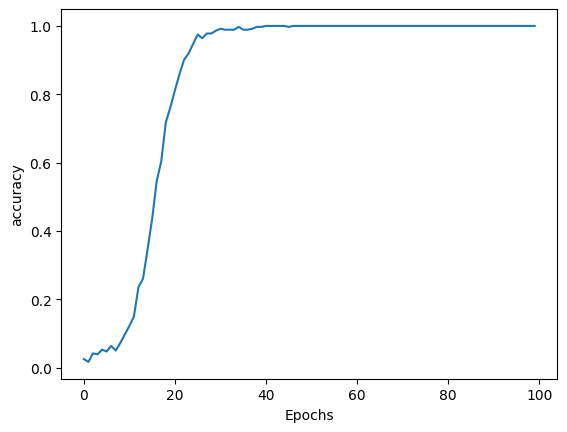

In [37]:
# Epochs vs Accuracy
plot_graphs(history, 'accuracy')

In [38]:
# This sets the initial seed text from where we want to start generating poetry from.
seed_text = "We shall service and maintain the Company Property and Equipment"

In [39]:
# This defines the number of words we want to generate in addition to the seed text.
next_words = 100

In [40]:
# The outer for loop iterates for the specified number of next_words to generate text.
for _ in range(next_words):
# This converts the current seed_text into a list of token indices using the tokenizer.
    token_list = tokenizer.texts_to_sequences([seed_text])[0]

# This pads the token_list to match the input length that the model expects. The length is set to max_sequence_len-1
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

# This line uses the trained model to predict the next word's index in the sequence based on the provided seed text. The argmax function is used to find the index with the highest predicted probability.
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""

# The inner loop iterates through the tokenizer's word_index to find the word associated with the predicted index.
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

# Appending the predicted word to the seed_text, effectively extending the seed for generating the next word
    seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 76ms/step
We shall service and maintain the Company Property and Equipment as soon as you become aware of it the company property and equipment shall be covered under the company’s insurance policy you should take care of company property and equipment and ensure that it is protected from the usual insurable risks with the same vigilance as would be the case in the work place conditions relating to company property and equipment are also found in the employee handbook to which you should refer you shall not do cause or permit any act or omission which will invalidate the insurance policy covering the company property you consent to the company's representatives
